# Aufgabe 3: Faltungstheorem
Das Faltungstheorem
\begin{align}
 F * G &= \mathcal{F}^{-1}(\mathcal{F}(F) \cdot \mathcal{F}(G))
\end{align}

besagt, dass eine Faltung im Ortsraum äquivalent zu einer Multiplikation im Frequenzraum ist.
Prüfen Sie die Gültigkeit dieses Theorems an mindestens zwei praktischen Beispielen (Auswahl von Filtermasken, Fouriertransformation der Filtermasken, $\ldots$)!
Vergleichen und analysieren Sie sowohl die Ergebnisse, als auch die Rechenzeiten im Hinblick auf verschiedene Filtergrößen!

## 0. Pfade, Pakete etc.

In [1]:
import glob
import urllib.request

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import imageio
import numpy as np
import scipy.ndimage

import time

import math

In [2]:
image_filter = './../material/Bilder/*.jpg'

## 1. Definition der Faltungsmaske
Definieren Sie hier die zu prüfende Faltungsmaske `A`.

In [3]:
# A = 1/9 * np.ones(shape=(9, 9))

In [4]:
m = 99
sigma = m / 5

A = [[np.exp(-((h*h + k*k)/(2 * sigma*sigma))) for k in range(-int(m/2), int(m/2) + 1)] for h in range(-int(m/2), int(m/2) + 1)]
A = np.asarray(A)

## 2. Laden des Bildes

In [5]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

## 3. Normalisieren des Bildes

In [6]:
image_max = np.float32(np.max(image))  # Maximum bestimmen
image_min = np.float32(np.min(image))  # Minimum bestimmen
image = (np.float32(image) - image_min) / (image_max-image_min)

## 3. Berechnung der Fouriertransformation
Setzen Sie hier ihre Lösung aus der vorigen Aufgabe ein:

In [7]:
image_transformed = np.fft.fftshift(np.fft.fft2(image))

Berechnen Sie nun die Fouriertransformation der Faltungsmaske. Achten Sie darauf, dass das Ergebnis dieser Operation dieselbe Größe hat wie `image_transformed`!

In [8]:
pad_width = image_transformed.shape[0] - A.shape[0]
pad_height = image_transformed.shape[1] - A.shape[1]
padded_A = np.pad(A, ((0, pad_width),(0, pad_height)), mode='constant', constant_values=0)
A_transformed = np.fft.fftshift(np.fft.fft2(padded_A))

<IPython.core.display.Javascript object>


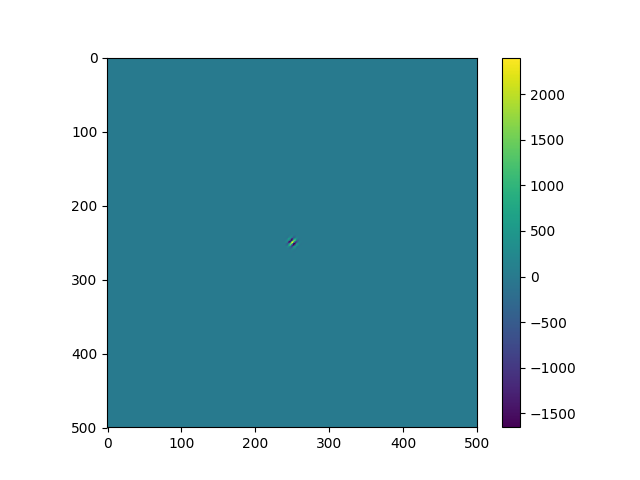

In [9]:
plt.figure()
plt.imshow(A_transformed.real)
plt.colorbar()

## 4. Filterung

Definieren Sie nun eine Funktion `ex3_filter_in_freq_domain`, die einen Filter im Frequenzbereich auf ein bereits fouriertransformiertes Bild anwendet. Beachten Sie das Faltungstheorem!

In [10]:
def ex3_filter_in_freq_domain(spectrum, transformed_filter):
    spectrum = spectrum * transformed_filter
    return spectrum

Das transformierte Bild (Spektrum) wird nun gefiltert. Fügen Sie hier eine Laufzeitmessung hinzu:

In [11]:
mult_start = time.time()
image_transformed_filtered = ex3_filter_in_freq_domain(image_transformed, A_transformed)
mult_end = time.time()
mult_time = mult_end - mult_start

## 5. Inverse Filterung
Das veränderte Spektrum soll nun in den Ortsbereich zurücktransformiert werden. Verwenden Sie dazu die entsprechenden Funktionen des Paketes `numpy.fft`.

In [12]:
transf_start = time.time()
inverse_transformed_shifted = np.fft.ifftshift(image_transformed_filtered)
inverse_transformed = np.fft.ifft2(inverse_transformed_shifted).real
transf_end = time.time()
transf_time = transf_end - transf_start
print('filtering time', mult_time + transf_time)

filtering time 0.04111170768737793


Vergleichen Sie nun das gefilterte Bild mit dem Originalbild:

<IPython.core.display.Javascript object>


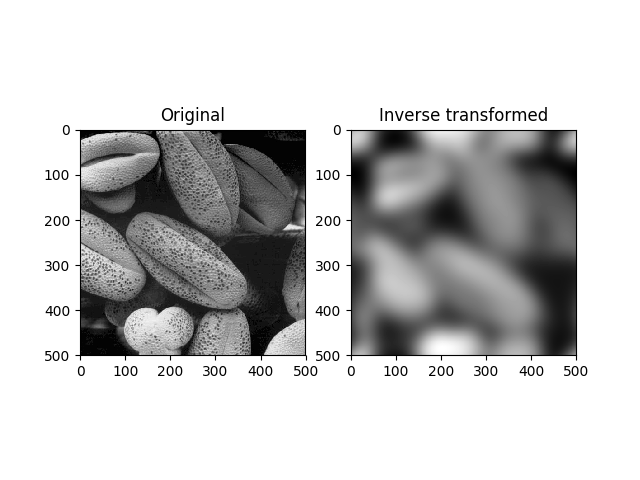

Text(0.5, 1.0, 'Inverse transformed')

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(inverse_transformed, cmap='gray')
axs[1].set_title('Inverse transformed')

## 6. Vergleich mit regulärer Faltung
Im Folgenden wird das Bild über eine `scipy.ndimage.filters`-Routine mit `A` gefaltet. Ermitteln Sie hier die Laufzeit!

In [14]:
conv_start = time.time()
image_convolved = scipy.ndimage.filters.convolve(image, A, mode='constant')
conv_end = time.time()
print('convolution time', conv_end - conv_start)

convolution time 5.503458023071289


Vergleichen Sie `image_convolved` mit `image_filtered`, indem Sie die Bilder nebeneinander anzeigen:

<IPython.core.display.Javascript object>


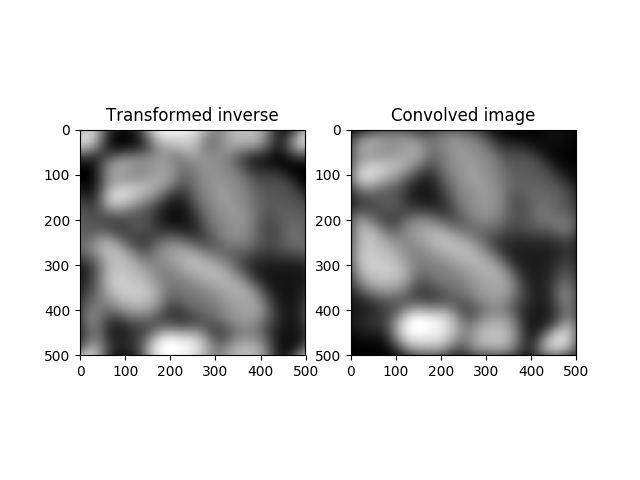

Text(0.5, 1.0, 'Convolved image')

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
axs[0].imshow(inverse_transformed, cmap='gray')
axs[0].set_title('Transformed inverse')

axs[1].imshow(image_convolved, cmap='gray')
axs[1].set_title('Convolved image')